In [26]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from helpers import save_dict,load_dict
from plotting_helpers import add_gridlines, set_x_ticks, add_energy_legends


In [27]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

def second_order(x, m1, m2, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2

def third_order(x, m1, m2, m3, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2 + m3 * x**3

In [28]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

bigger_font_size=22
column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Load Data

In [29]:
Ls = np.arange(6,37,6)
scales = [1.,2.,4.]
rates = [0.475,0.25,0.158]
Ts = [0.25,1.00]
mss = ['Square', 'Triangular']

In [30]:
data = load_dict('./plotting_data/final_energies_data.pkl')
plotting_data = load_dict('./plotting_data/final_energies_data_plotting.pkl')
zero_var = load_dict('./plotting_data/zero_var_energies.pkl')
print(zero_var['periodic']['energies'])

[-0.566093185505078, -0.5524407773037793, -0.5514704754298156, -0.5515267586611189, -0.5520651834097696]


In [31]:
rate_markers={0.158:'*',0.25:'H',0.475:'^'}
rate_lines={0.158:':',0.25:'--',0.475:'-'}
rate_alphas={0.475:0.2,0.25:0.5,0.158:0.9}

colorscale_sq = plt.get_cmap('viridis')
colorscale_tri = plt.get_cmap('plasma')
shades = np.linspace(0.,0.9,2*len(scales))[::-2]
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'Square':{1.0:colors_sq[0],2.0:colors_sq[1],4.0:colors_sq[2]},
                'Triangular':{1.0:colors_tri[0],2.0:colors_tri[1],4.0:colors_tri[2]}}

\Linear Fit, scale=1.0, rate=0.475
M from <SS>:   -0.540995639155423
\Linear Fit, scale=1.0, rate=0.25
M from <SS>:   -0.5440990452134458
\Linear Fit, scale=2.0, rate=0.475
M from <SS>:   -0.5433025865664347
\Linear Fit, scale=2.0, rate=0.25
M from <SS>:   -0.5458797830572292
\Linear Fit, scale=2.0, rate=0.158
M from <SS>:   -0.5473448762166997
\Linear Fit, scale=4.0, rate=0.475
M from <SS>:   -0.5452708184637615
\Linear Fit, scale=4.0, rate=0.25
M from <SS>:   -0.547170428844061
\Linear Fit, scale=4.0, rate=0.158
M from <SS>:   -0.548201412620238
\Linear Fit, zero-var energies
M from <SS>:   -0.5512717918107455


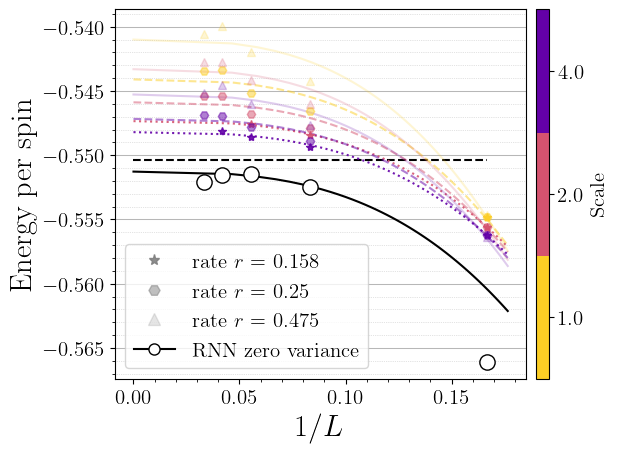

In [32]:
fig, ax = plt.subplots()
show_zero_var = True
both_MS = False

# ## open bc run
# bc_ = 'open'
# ms_ = 'Square'
# scale_ = 1.0
# rate_ = 0.475
# T_ = 0.25

# open_ens_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
# open_ens = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['energies']/3
# open_ens_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['std errors']

# ax.errorbar(1/open_ens_ls,open_ens,#yerr=open_ens_errs,
#             marker=rate_markers[rate_],fmt='o',color=scale_shades[scale_],alpha=T_alphas[f'{T_}'],label=f'open')  

## periodic bc runs
bc_ = 'periodic'
ms_ = 'Triangular'
for scale_ in scales:
    for rate_ in rates[:]:
        T_ = 1.0
        T_ = "{:.2f}".format(T_)

        peri_ens_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        peri_ens = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['energies']
        peri_ens_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['std errors']

        ax.errorbar(1/peri_ens_ls,peri_ens,#yerr=peri_ens_errs,
                    marker=rate_markers[rate_],fmt='o',color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_])  

        if len(peri_ens)>=2:
                ens_x = 1/peri_ens_ls**3
                # params, covariance = curve_fit(second_order, ens_x, peri_ens)
                reg = LinearRegression().fit(ens_x[:,np.newaxis], peri_ens)
                x_mesh = np.arange(0,1.2*max(ens_x),0.0001)
                ax.plot(x_mesh**(1/3),reg.coef_*x_mesh+reg.intercept_,
                        color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],linestyle=rate_lines[rate_])
                print(f"\Linear Fit, scale={scale_}, rate={rate_}\nM from <SS>:   {(reg.intercept_)}")

if show_zero_var:
        i=1
        zero_var_ls = 1/np.array(zero_var['periodic']['Ls'][:])
        ax.errorbar(zero_var_ls,zero_var['periodic']['energies'][:],#yerr=zero_var['periodic']['energy errors bootstrapped'][:],
                    ms=11,marker='o',fmt='o',color='k',mfc='white')  
        # ax.errorbar(zero_var_ls[:3],np.array([-0.559978,-0.555947,-0.556413]),
        #             ms=11,marker='o',fmt='o',color='red',mfc='None')  
        reg_x = zero_var_ls**3
        reg = LinearRegression().fit(reg_x[i:-1,np.newaxis], zero_var['periodic']['energies'][i:-1])
        x_mesh = np.arange(0,1.2*max(reg_x),0.0001)
        ax.plot(x_mesh**(1/3),reg.coef_*x_mesh+reg.intercept_,
                color='k',linestyle='-')
        print(f"\Linear Fit, zero-var energies\nM from <SS>:   {(reg.intercept_)}")

if both_MS:
        bc_ = 'periodic'
        ms_ = 'Square'
        scale_ = 2.0
        rate_ = 0.475
        T_ = "{:.2f}".format(1.00)

        sqMS_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        sqMS = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['energies']
        sqMS_err = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['std errors']

        ax.errorbar(1/sqMS_ls,sqMS,
                marker=rate_markers[rate_],fmt='o',color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_])  

# references
# ax.hlines(-0.1819*3,0,max(1/peri_ens_ls),color='k',alpha=0.4,linestyle='--',label='GFMC')
# ax.hlines(-0.1825*3,0,max(1/peri_ens_ls),color='k',alpha=0.7,linestyle='--',label='ED')
ax.hlines(-0.55038,0,max(1/peri_ens_ls),color='k',alpha=1,linestyle='--',label='TN')
# ax.scatter(1/6,-0.560313,marker='*',color='red')

ax.set_xlabel(r'$1/L$',fontsize=bigger_font_size)
ax.set_ylabel(r'Energy per spin',fontsize=bigger_font_size)
ax.legend(loc='center',bbox_to_anchor=(1.25,0.5),ncol=1)

add_gridlines(axes='y')
add_energy_legends(show_runs=True,both_MS=both_MS,show_zero_var=show_zero_var)

filename = 'energies_peri'
if show_zero_var:
      filename+='_w_zero_var'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

Need to get zero variance energies and perform the finite-size scaling there...

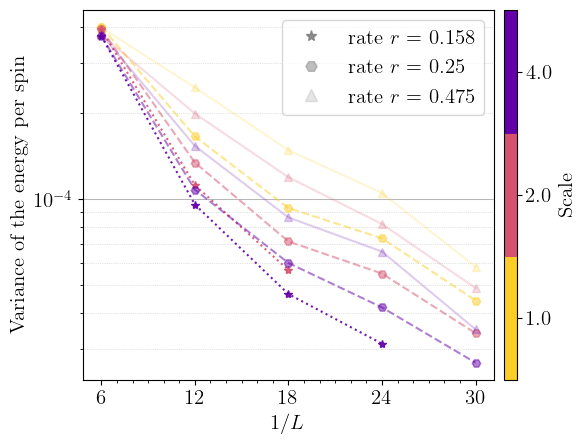

In [33]:
fig, ax = plt.subplots()
both_MS = False

## periodic bc runs
bc_ = 'periodic'
ms_ = 'Triangular'
for scale_ in scales:
    for rate_ in rates:
        T_ = 1.0
        T_ = "{:.2f}".format(T_)

        peri_ens_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        peri_vars = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['variances']

        ax.errorbar(peri_ens_ls,peri_vars,#yerr=peri_ens_errs,
                    marker=rate_markers[rate_],linestyle=rate_lines[rate_],color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_])  

if both_MS:
    bc_ = 'periodic'
    ms_ = 'Square'
    scale_ = 2.0
    rate_ = 0.475
    T_ = "{:.2f}".format(1.00)

    sqMS_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
    sqMS = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['variances']
    sqMS_err = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['std errors']

    ax.errorbar(sqMS_ls,sqMS,
                marker=rate_markers[rate_],linestyle=rate_lines[rate_],color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_])  


add_energy_legends(show_runs=True,both_MS=both_MS)
add_gridlines(axes='y')
set_x_ticks(axes=ax)

ax.set_xlabel(r'$1/L$')
ax.set_ylabel(r'Variance of the energy per spin')
ax.set_yscale('log')

filename = 'energy_vars_peri'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()